This code is exploring the construction of a bimodal (two-Gaussian) pdf

In [1]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import scipy.interpolate as scpy

In [2]:
# Graphics
%matplotlib notebook

In [3]:
# Here's a Weibull function
def pWeibull(r, sigma, eta):
    ''' Weibull function '''
    from numpy import exp
    mu = 1-r
    ret = 2*eta/sigma**2/mu**3 * \
        (((mu**(-2)-1)/sigma**2)**(eta-1)) * \
        exp(-((mu**(-2)-1)/sigma**2)**eta)
    return ret

In [4]:
# Lay out a range of r-values we want to evaluate the PDF at
rminforhist = 1e-6
rmaxforhist = .99999
numforhist = 100
rvals=np.geomspace(rminforhist,rmaxforhist,numforhist)
xvals = np.log(rvals)

Getting a Gaussian PDF

<IPython.core.display.Javascript object>


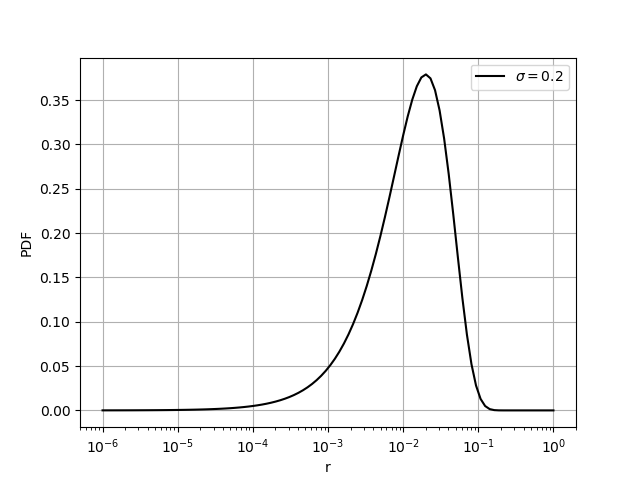

Area = 0.9992591770036596


In [5]:
# Specify parameters
eta1 = 1.0
sigma1 = 0.2

# Calculate the PDF
pdf1 = rvals*pWeibull(rvals, sigma1, eta1)

# Plot it
plt.figure()
plt.semilogx(rvals,pdf1,'k-',label=r'$\sigma=$'+str(sigma1))
plt.xlabel('r')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()

# Testing the normalization
numerical_integral = -np.trapz(xvals,pdf1); print ('Area =', numerical_integral)

Getting another Gaussian PDF

<IPython.core.display.Javascript object>


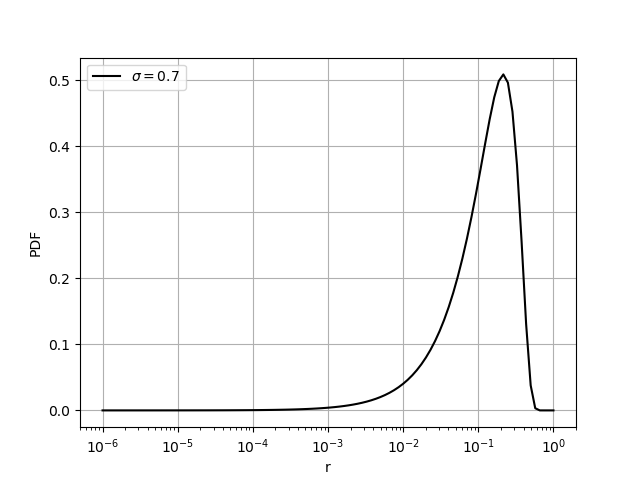

Area = 0.9999392763840214


In [6]:
# Specify parameters (different from previous)
eta2= 1.0
sigma2= 0.7

# Calculate the PDF
pdf2 = rvals*pWeibull(rvals, sigma2, eta2)

# Plot it
plt.figure()
plt.semilogx(rvals,pdf2,'k-',label=r'$\sigma=$'+str(sigma2))
plt.xlabel('r')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()

# Testing the normalization
numerical_integral = -np.trapz(xvals,pdf2); print ('Area =', numerical_integral)        

Getting the weighted sum of these two Gaussian PDFs

<IPython.core.display.Javascript object>


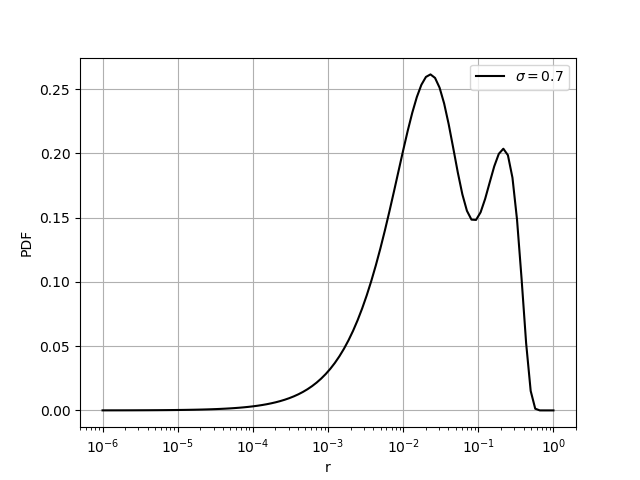

In [7]:
# Add the PDFs to make a new combination 
N = 0.4 # 0<N<1
added = (1-N)*(rvals*pWeibull(rvals, sigma1, eta1)) + N*(rvals*pWeibull(rvals, sigma2, eta2))
# Plot the combined PDF
plt.figure()
plt.semilogx(rvals,added,'k-',label=r'$\sigma=$'+str(sigma2))
plt.xlabel('r')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()  

In [8]:
# Just testing
xvals = np.log(rvals)
Zsquarvals = 1/(1-rvals)**2-1 #print (Zsquarvals)
Z4vals = Zsquarvals**2
# mean_Zsquar = -np.trapz(rvals, pWeibull(rvals, sigma2, eta2)*Zsquarvals) ;print(mean_Zsquar)
# mean_Z4 = -np.trapz (rvals, pWeibull(rvals, sigma2, eta2)*Z4vals) 

mean_Zsquar = -np.trapz(xvals, pdf1*Zsquarvals) ;print(mean_Zsquar)
mean_Z4 = -np.trapz (xvals, pdf1*Z4vals) 

std_devsquar = mean_Z4 - mean_Zsquar**2 
sigma_test = std_devsquar**.25
print('This is sigma = ', sigma_test)


0.03999999856818924
This is sigma =  0.20000000357943906


In [9]:
#characterizing our constructed pdf
mean_Zsquar = -np.trapz(xvals, added*Zsquarvals) ;print(mean_Zsquar)
mean_Z4 = -np.trapz (xvals, added*Z4vals)
std_devsquar = mean_Z4 - mean_Zsquar**2 ;print(std_devsquar**0.5)
sigma = std_devsquar**0.25
print('sigma estimated from obs =',sigma)



0.21999978176747903
0.3815785235013012
sigma estimated from obs = 0.6177204250316654


Eta estimated from obs = 0.6025396860216731
sigmaW estimated from obs = 0.3834371979156147


<IPython.core.display.Javascript object>


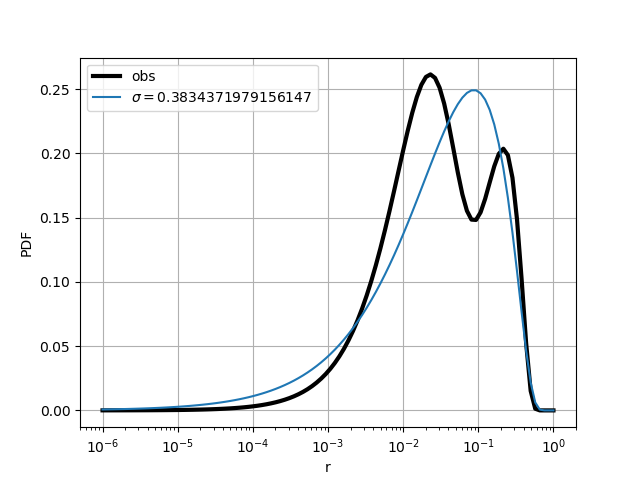

In [10]:
# Eta using Eq. 12
etaW = mean_Zsquar/sigma**2 + ((np.pi**2 - 9)/6)*(1-(mean_Zsquar/sigma**2))**2
print('Eta estimated from obs =', etaW)

# SigmaW using Eq. 13
sigmaW = (mean_Zsquar/gamma(1/etaW+1))**0.5
print('sigmaW estimated from obs =',sigmaW)

# Graphics
plt.figure()
plt.semilogx(rvals,added,'k-',label='obs',linewidth=3)
plt.semilogx(rvals, pWeibull(rvals, sigmaW, etaW)*rvals, label=r'$\sigma=$'+str(sigmaW))
plt.xlabel('r')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()  

<IPython.core.display.Javascript object>


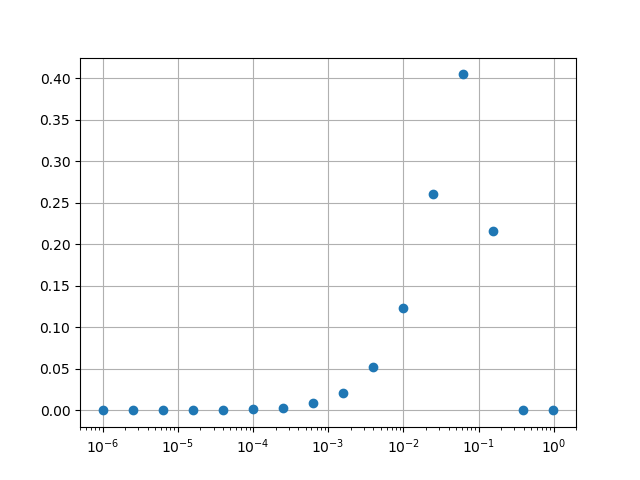

In [11]:
#practice to fitting points to a Weibull function
x = np.geomspace(1e-6,.99,16)
y=pWeibull(x,0.38,1.0)*x

#plot scattered points
plt.figure()
plt.semilogx(x,y,'o')
plt.grid(True)

Working on sigma =  0.1
Got rsquar =  0.027352934066453234
Working on sigma =  0.2
Got rsquar =  0.011819795070967339
Working on sigma =  0.30000000000000004
Got rsquar =  0.00220534841406457
Working on sigma =  0.4
Got rsquar =  0.00013124406546245206
Working on sigma =  0.5
Got rsquar =  0.003210094154988
Working on sigma =  0.6
Got rsquar =  0.006737547476513648
Working on sigma =  0.7000000000000001
Got rsquar =  0.01074243217038154
Working on sigma =  0.8
Got rsquar =  0.017267401662363076
Working on sigma =  0.9
Got rsquar =  0.02582107775785415
Working on sigma =  1.0
Got rsquar =  0.034221818080344996
best_rsquar= 0.00013124406546245206
best_sigma= 0.4


<IPython.core.display.Javascript object>


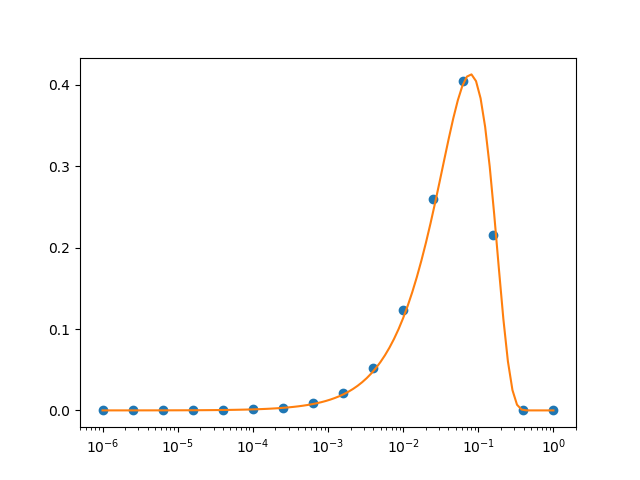

In [12]:
length=10 #definging the length of the range (sigma precision)
best_rsquar=100
best_sigma=0
sigmalist = np.linspace(.1,1,length)
for sigma in sigmalist:
    print('Working on sigma = ', sigma)
    r_squar=0
    deviation = y - pWeibull(x, sigma, 1.0)*x
    r_squar = np.sum(deviation**2/len(x))
    print('Got rsquar = ', r_squar)
    if r_squar < best_rsquar:
        best_rsquar= r_squar
        best_sigma= sigma
print("best_rsquar= "+ str(best_rsquar) + "\nbest_sigma= "+ str(best_sigma))

#testing our found sigma value with an eta of 1.0
plt.figure()
plt.semilogx(x,y,'o')
plt.semilogx(rvals, pWeibull(rvals, best_sigma, 1.0)*rvals, label=r'$\sigma=$'+str(sigmaW))

In [38]:
# Tutorial for Katie
xtest = np.linspace(1,2,11); print(xtest)
xtest = np.geomspace(1,2,11); print(xtest)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
[1.         1.07177346 1.14869835 1.23114441 1.31950791 1.41421356
 1.51571657 1.62450479 1.74110113 1.86606598 2.        ]
